#pandas, numpy, matplotlib 연습문제 답안(중급)

##pandas

In [1]:
# pandas 라이브러리 import하기
import pandas as pd

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Zp8GnBFJwA6OzzIKX3MC83fg78qTmSiZ' -O titanic.csv #titanic.csv 파일 읽어오기

--2021-03-18 10:20:08--  https://docs.google.com/uc?export=download&id=1Zp8GnBFJwA6OzzIKX3MC83fg78qTmSiZ
Resolving docs.google.com (docs.google.com)... 74.125.70.101, 74.125.70.138, 74.125.70.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.70.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2qqn10u0pnvofpjvtnr6co2n0r8k85cr/1616062800000/03313771899298518038/*/1Zp8GnBFJwA6OzzIKX3MC83fg78qTmSiZ?e=download [following]
--2021-03-18 10:20:09--  https://doc-0s-0c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2qqn10u0pnvofpjvtnr6co2n0r8k85cr/1616062800000/03313771899298518038/*/1Zp8GnBFJwA6OzzIKX3MC83fg78qTmSiZ?e=download
Resolving doc-0s-0c-docs.googleusercontent.com (doc-0s-0c-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting to doc-0s-0c-docs.googleusercontent.com (doc-0s-0c-docs.

In [3]:
# titanic 데이터 읽어오기
titanic = pd.read_csv("/content/titanic.csv")

In [4]:
# titanic Dataframe 보기
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**1. 남자(male)이면서 Pclass가 1인 승객은 몇 명일까요?**

In [5]:
# 코드 작성
count = titanic.loc[(titanic['Sex'] == 'male') & (titanic['Pclass'] == 1), 'PassengerId'].count()
print(count)

122


**2. 남자이면서 Pclass가 1이고 Fare가 50 이상인 승객은 몇 명일까요?**

In [6]:
# 코드 작성
count = titanic.loc[(titanic['Sex'] == 'male') & (titanic['Pclass'] == 1) & (titanic['Fare'] >= 50), 'PassengerId'].count()
print(count)

58


**3. 2번 문제의 내용을 데이터로 한 Dataframe 만들기**

In [7]:
# 코드 작성
survived_male = titanic.loc[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1), 'PassengerId'].count()
survived_female = titanic.loc[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1), 'PassengerId'].count()
dead_male = titanic.loc[(titanic['Sex'] == 'male') & (titanic['Survived'] == 0), 'PassengerId'].count()
dead_female = titanic.loc[(titanic['Sex'] == 'female') & (titanic['Survived'] == 0), 'PassengerId'].count()

df = pd.DataFrame({ 'male': [dead_male, survived_male], 'female': [dead_female, survived_female] })

**4. titanic에서 Name에서 first name만을 뽑아 새로운 열인 First_Name을 titanic에 추가해주세요**

ex) johann + Sebastian + Bach

(First name) +(Middle name) + (Surname)

In [9]:
# 코드 작성
titanic["First Name"] = titanic["Name"].str.extract('([A-Za-z]+)\,')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


##matplotlib

In [10]:
# matplotlib import하기
import matplotlib.pyplot as plt

**Hint**
특정 조건의 행 개수 세기

In [11]:
dead_cnt = titanic.loc[titanic['Survived'] == 0, 'PassengerId'].count()
survived_cnt = titanic.loc[titanic['Survived'] == 1, 'PassengerId'].count()

print(dead_cnt)
print(survived_cnt)

549
342


**1. 타이타닉의 사망자, 생존자를 Bar Chart로 표현해보세요.**

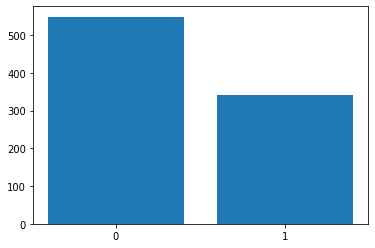

In [12]:
# 코드 작성
plt.bar(['0', '1'], [dead_cnt, survived_cnt])
plt.show()

**2. Bar Chart에 나타나는 두 개의 Bar의 색을 다르게 바꿔보세요!**

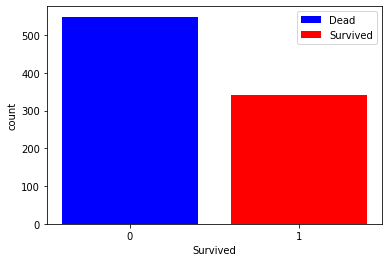

In [14]:
# 코드 작성

dead_cnt = titanic[titanic['Survived'] == 0].shape[0]
survived_cnt = titanic[titanic['Survived'] == 1].shape[0]

# 단계2 : 각 그래프에 다른 색, 축 이름, 범례 설정
plt.bar(['0'], [dead_cnt], color='blue') # 파란색 지정
plt.bar(['1'], [survived_cnt], color='red') # 빨간색 지정

plt.xlabel('Survived') # x축 이름
plt.ylabel('count') # y 축 이름
plt.legend(['Dead', 'Survived']) # 범례

plt.show()

##seaborn(심화, 자율)

seaborn을 사용하면 matplotlib로 힘들게 그린 그래프를 더 쉽게 그릴 수 있습니다!

In [15]:
import seaborn as sns
sns.set()

In [16]:
# titanic 데이터 읽어오기
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


**1. seaborn의 count plot 사용하기**

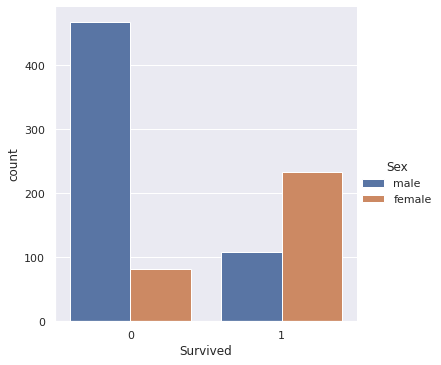

In [17]:
sns.catplot(data=titanic, x='Survived', hue='Sex', kind='count')

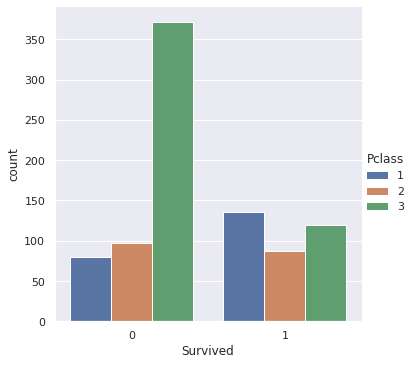

In [18]:
# 위 그래프를 참고해 Pclass별로 나누어 생존자, 사망자 수 카운트
sns.catplot(data=titanic, x='Survived', hue='Pclass', kind='count')

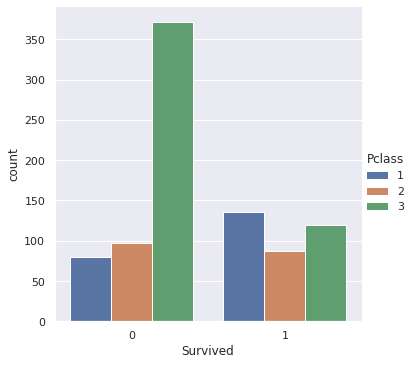

In [19]:
# 위 그래프를 참고해 Embarked별로 나누어 생존자, 사망자 수 카운트
sns.catplot(data=titanic, x='Survived', hue='Pclass', kind='count')

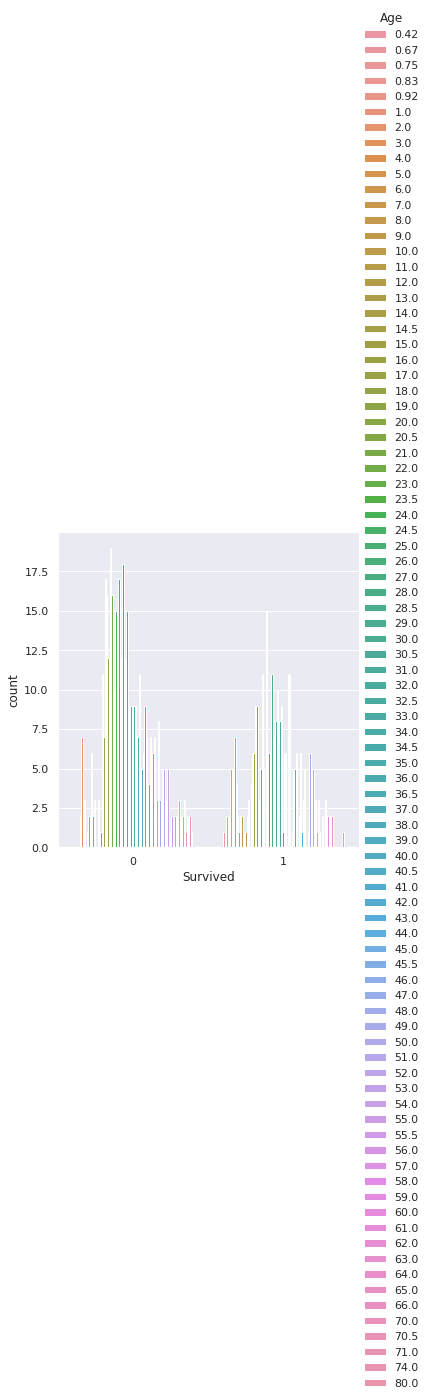

In [20]:
# 위 그래프를 참고해 Age별로 나누어 생존자, 사망자 수 카운트
sns.catplot(data=titanic, x='Survived', hue='Age', kind='count')